In [25]:
import numpy as np 
import pandas as pd 
from scipy.io import arff 
from apyori import apriori
import matplotlib.pyplot as plt
import networkx as nx

In [26]:

data = arff.loadarff('supermarket.arff') 
df = pd.DataFrame(data[0])

In [27]:
df.head()

,department1,department2,department3,department4,department5,department6,department7,department8,department9,grocery misc,...,department208,department209,department210,department211,department212,department213,department214,department215,department216,total
0,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'high'
1,b't',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
2,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
3,b't',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
4,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'


In [28]:
df = df.drop(['total'],axis=1)

In [29]:
departments = list(df.columns)

In [30]:

departments

['department1',
 'department2',
 'department3',
 'department4',
 'department5',
 'department6',
 'department7',
 'department8',
 'department9',
 'grocery misc',
 'department11',
 'baby needs',
 'bread and cake',
 'baking needs',
 'coupons',
 'juice-sat-cord-ms',
 'tea',
 'biscuits',
 'canned fish-meat',
 'canned fruit',
 'canned vegetables',
 'breakfast food',
 'cigs-tobacco pkts',
 'cigarette cartons',
 'cleaners-polishers',
 'coffee',
 'sauces-gravy-pkle',
 'confectionary',
 'puddings-deserts',
 'dishcloths-scour',
 'deod-disinfectant',
 'frozen foods',
 'razor blades',
 'fuels-garden aids',
 'spices',
 'jams-spreads',
 'insecticides',
 'pet foods',
 'laundry needs',
 'party snack foods',
 'tissues-paper prd',
 'wrapping',
 'dried vegetables',
 'pkt-canned soup',
 'soft drinks',
 'health food other',
 'beverages hot',
 'health&beauty misc',
 'deodorants-soap',
 'mens toiletries',
 'medicines',
 'haircare',
 'dental needs',
 'lotions-creams',
 'sanitary pads',
 'cough-cold-pain',
 'de

In [31]:
# Display the count of null values in each column
null_counts = df.isnull().sum()
print(null_counts)

department1      0
department2      0
department3      0
department4      0
department5      0
                ..
department212    0
department213    0
department214    0
department215    0
department216    0
Length: 216, dtype: int64


In [32]:

sales = df.to_numpy().astype(str)

In [33]:

sales

array([['?', '?', '?', ..., '?', '?', '?'],
       ['t', '?', '?', ..., '?', '?', '?'],
       ['?', '?', '?', ..., '?', '?', '?'],
       ...,
       ['?', '?', '?', ..., '?', '?', '?'],
       ['?', '?', '?', ..., '?', '?', '?'],
       ['t', '?', '?', ..., '?', '?', '?']], dtype='<U1')

In [34]:
sales.shape

(4627, 216)

In [35]:
#Empty lists to be filled with the departments from which a customer has purchased at least one product
transactions = [ [] for _ in range(df.shape[0]) ]

#iterate over every element in the sales matrix and, if a department belongs to a transaction, we append it
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if sales[i,j] == "t":
            transactions[i].append(departments[j])

In [36]:
mins = 0.2
minc = 0.7
minl = 1.34

results = list(apriori(transactions, min_support=mins, min_confidence=minc, min_lift=minl))

all_rules = []

for result in results:
    for rule in result[2]:
        all_rules.append({
            'antecedent': list(rule[0]),
            'consequent': list(rule[1]),
            'support': result[1],
            'confidence': rule[2],
            'lift': rule[3]
        })

# Sort rules by confidence, then by lift, and finally by support
sorted_rules = sorted(all_rules, key=lambda x: (x['confidence'], x['lift'], x['support']), reverse=True)

# Get the top 3 rules
top_rules = sorted_rules[:3]

print("Top 3 rules:")
for rule in top_rules:
    print(f"{rule['antecedent']} ---> {rule['consequent']}\n"
          f"SUPP={round(rule['support'], 2)}\n"
          f"CONF={round(rule['confidence'], 2)}\n"
          f"LIFT={round(rule['lift'], 2)}\n")
    print('\n')


Top 3 rules:
['frozen foods', 'party snack foods', 'bread and cake'] ---> ['biscuits']
SUPP=0.22
CONF=0.78
LIFT=1.38



['frozen foods', 'margarine', 'bread and cake'] ---> ['biscuits']
SUPP=0.21
CONF=0.76
LIFT=1.35



['party snack foods', 'bread and cake', 'baking needs'] ---> ['biscuits']
SUPP=0.2
CONF=0.76
LIFT=1.34





In [37]:
mins = 0.2
minc = 0.5
minl = 1.34

results = list(apriori(transactions, min_support=mins, min_confidence=minc, min_lift=minl))

filtered_rules = []

# Extract rules with 2 items in antecedent and 1 item in consequent
for result in results:
    for rule in result.ordered_statistics:
        antecedent = list(rule.items_base)
        consequent = list(rule.items_add)
        
        if len(antecedent) == 2 and len(consequent) == 1:
            filtered_rules.append({
                'antecedent': antecedent,
                'consequent': consequent,
                'support': result.support,
                'confidence': rule.confidence,
                'lift': rule.lift
            })

# Sort rules by confidence, then by lift, and finally by support
sorted_rules = sorted(filtered_rules, key=lambda x: (x['confidence'], x['lift'], x['support']), reverse=True)

# Get the top 3 rules
top_rules = sorted_rules[:3]

for rule in top_rules:
    print(f"{rule['antecedent']} ---> {rule['consequent']}\n"
          f"SUPP={round(rule['support'], 2)}\n"
          f"CONF={round(rule['confidence'], 2)}\n"
          f"LIFT={round(rule['lift'], 2)}\n")
    print('\n')


['biscuits', 'juice-sat-cord-ms'] ---> ['party snack foods']
SUPP=0.23
CONF=0.69
LIFT=1.38



['biscuits', 'sauces-gravy-pkle'] ---> ['party snack foods']
SUPP=0.21
CONF=0.69
LIFT=1.36





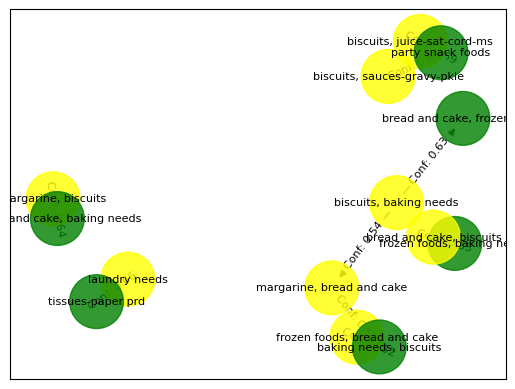

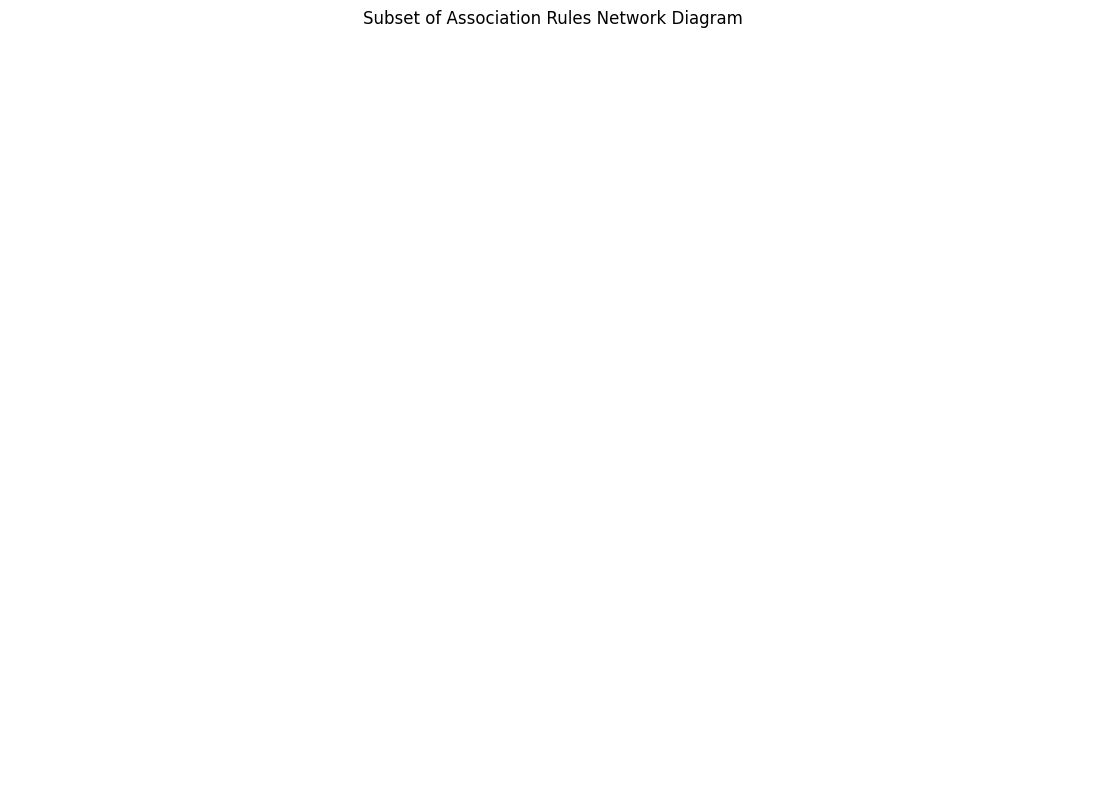

In [38]:
all_rules = []

for result in results:
    for rule in result.ordered_statistics:
        antecedent = ', '.join(rule.items_base)
        consequent = ', '.join(rule.items_add)
        support = result.support
        confidence = rule.confidence
        lift = rule.lift
        all_rules.append((antecedent, consequent, support, confidence, lift))

subset_rules = all_rules[:10]

G = nx.DiGraph()


for rule in subset_rules:
    G.add_node(rule[0], color='yellow', style='filled')
    G.add_node(rule[1], color='green', style='filled')

for rule in subset_rules:
    G.add_edge(rule[0], rule[1], weight=rule[4], label=f"Conf: {round(rule[3], 2)}")

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color=[node[1]['color'] for node in G.nodes(data=True)], node_size=1500, alpha=0.8)

nx.draw_networkx_edges(G, pos, width=[edge[2]['weight'] for edge in G.edges(data=True)], arrows=True, alpha=0.5)

nx.draw_networkx_labels(G, pos, font_size=8)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)


plt.figure(figsize=(14, 10))


plt.title('Subset of Association Rules Network Diagram')
plt.axis('off')  
plt.show()
